In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn import datasets
%matplotlib inline

np.random.seed(0)
torch.manual_seed(0)

In [38]:
iris = datasets.load_iris()

In [39]:
X=iris['data']
y=iris['target']

In [40]:

# Split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.25, random_state=73)

In [41]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [42]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=4, out_features=16)
        self.fc2 = nn.Linear(in_features=16, out_features=12)
        self.output = nn.Linear(in_features=12, out_features=3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x


In [43]:
model = ANN()
model

ANN(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=3, bias=True)
)

In [20]:
# model = nn.Sequential(
#     nn.Linear(4, 16),
#     nn.ReLU(),
#     nn.Linear(16, 12),
#     nn.ReLU(),
#     nn.Linear(12, 3),
#     )
    

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Epoch: 0 Loss: 1.0577579736709595
Epoch: 10 Loss: 0.687595784664154
Epoch: 20 Loss: 0.38314154744148254
Epoch: 30 Loss: 0.21438808739185333
Epoch: 40 Loss: 0.11610157042741776
Epoch: 50 Loss: 0.08109736442565918
Epoch: 60 Loss: 0.07067294418811798
Epoch: 70 Loss: 0.06652814149856567
Epoch: 80 Loss: 0.06414549797773361
Epoch: 90 Loss: 0.062425773590803146


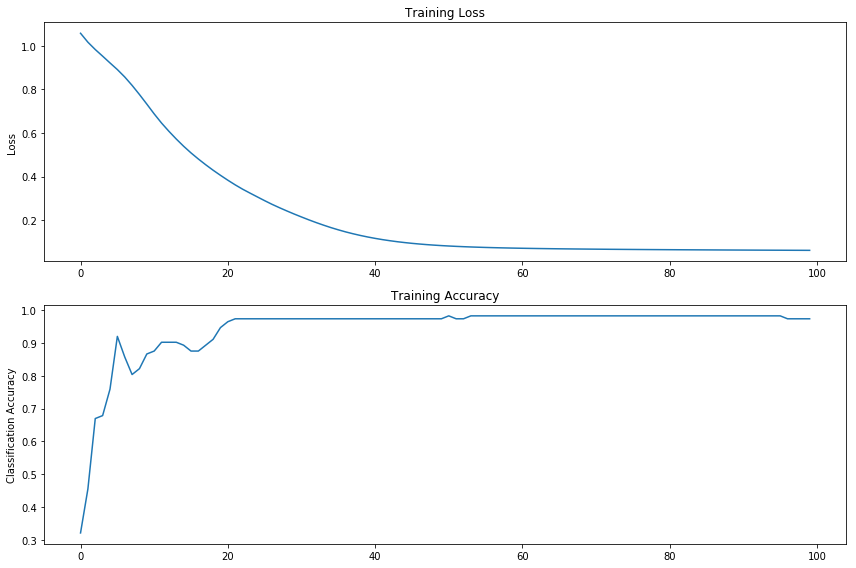

CPU times: user 596 ms, sys: 672 ms, total: 1.27 s
Wall time: 1.97 s


In [45]:
%%time
epochs = 100
loss_arr = []
train_loss = []
train_accuracy = []

for i in range(epochs):
    y_hat = model.forward(X_train)
    loss = criterion(y_hat, y_train)
    accuracy = len(np.where(y_train == y_hat.argmax(1))[0]) / len(y_train)
    train_accuracy.append(accuracy)
    train_loss.append(loss.item())
 
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
 
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(train_loss)
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')

ax[1].plot(train_accuracy)
ax[1].set_ylabel('Classification Accuracy')
ax[1].set_title('Training Accuracy')

plt.tight_layout()
plt.show()

In [46]:
y_hat_test = model(X_test)
test_accuracy= len(np.where(y_test == y_hat_test.argmax(1))[0]) / len(y_test)
print("Test Accuracy {:.2f}".format(test_accuracy))

Test Accuracy 1.00
